In [66]:
import os
from IPython.display import display, Image
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy.stats import linregress
import math
from functools import reduce
import argparse
from Bio import SeqIO, Entrez, pairwise2
Entrez.email = 'hongyingsun1101@gmail.com'
from Bio.SeqRecord import SeqRecord
import re, time
import os, sys, glob
import random
import uuid
# from skbio.tree import TreeNode
# from skbio import read
# from skbio.stats.distance import DistanceMatrix
# from skbio.stats.distance import DissimilarityMatrix

from scipy import stats
from ast import literal_eval
import sqlite3
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib import pyplot

In [2]:
df =pd.read_csv("pplacer_stats_score_merged.csv", index_col='unique_index')

d:\program files (x86)\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,7,8,10,13,19,20,21,24,30,31,32,35,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.columns

Index(['Unnamed: 0', 'index_x', 'RDP_10398_adcl', 'RDP_5224_adcl',
       'RDP_1017_adcl', 'RDP_92_adcl', 'RDP_12_adcl', 'community_x',
       'sourceSeq_x', 'organism_x', 'ncbi_tax_id_x', 'multiplicity_x',
       'index_y', 'RDP_10398_edpl', 'RDP_5224_edpl', 'RDP_1017_edpl',
       'RDP_92_edpl', 'RDP_12_edpl', 'community_y', 'sourceSeq_y',
       'organism_y', 'ncbi_tax_id_y', 'multiplicity_y', 'index_x.1',
       'RDP_10398_mindistl', 'RDP_5224_mindistl', 'RDP_1017_mindistl',
       'RDP_92_mindistl', 'RDP_12_mindistl', 'community_x.1', 'sourceSeq_x.1',
       'organism_x.1', 'ncbi_tax_id_x.1', 'multiplicity_x.1', 'index_y.1',
       'RDP_10398_prichness', 'RDP_5224_prichness', 'RDP_1017_prichness',
       'RDP_92_prichness', 'RDP_12_prichness', 'community_y.1',
       'sourceSeq_y.1', 'organism_y.1', 'ncbi_tax_id_y.1', 'multiplicity_y.1',
       'RDP_10398_score', 'RDP_5224_score', 'RDP_1017_score', 'RDP_92_score',
       'RDP_12_score'],
      dtype='object')

In [18]:
df=df.fillna(method='ffill')

In [28]:
df_rdp_10398_CC11CM0=df.loc[df["community_x"]=="CC11CM0",["RDP_10398_adcl", "RDP_10398_edpl", "RDP_10398_mindistl","RDP_10398_prichness","RDP_10398_score","community_x"]]

In [34]:
df_rdp_10398_CC11CM0.RDP_10398_score.isna()

unique_index
CC11CM0SCR00cdec97c058446e83e0ef032e61806d    True
CC11CM0SCR35529da454f0497fa16e04841e8e1639    True
CC11CM0SCR1083e70ce28e4961b8298356c0d69000    True
CC11CM0SCR8898bf89e307445282cd2fb3acb183a0    True
CC11CM0SCRfc7f700b82e44da39405162a7e5b8b77    True
CC11CM0SCRbb008cff8b87453b9ed228be5d008673    True
CC11CM0SCR3e39a5fc61b6420cac1c2dd465292aec    True
CC11CM0SCRb15eac580de84cfd8e55224087a7b676    True
CC11CM0SCR1e06de32f41c414aaa57f33949f4905c    True
CC11CM0SCRaf64d873b07c43e18a82b0be7ef37e3a    True
CC11CM0SCRf7daacc404cb4eb9a49ba1de3996a898    True
CC11CM0SCRb70978c24c1a4fab8659357b833938e6    True
CC11CM0SCRe9f5fb9ad3e5407fb686716731557fb8    True
CC11CM0SCRade8cd02ba724e42b455e0ced33aba32    True
CC11CM0SCRd526be427f7d40d99ca20d6b9ffc434d    True
CC11CM0SCR4fb0d8fe4a4f42d598229f7496ec6c09    True
CC11CM0SCR374d88a64290415ba45a37a3e99e9405    True
CC11CM0SCR2ae719dea83c49169b6cb67e532d1fbf    True
CC11CM0SCR4220806246c9445f9abbf3606a5a56a1    True
CC11CM0SCR5f7af4e6

In [5]:
df_rdp_10398=df[["RDP_10398_adcl", "RDP_10398_edpl", "RDP_10398_mindistl","RDP_10398_prichness","RDP_10398_score", "community_x"]]
df_rdp_10398=df_rdp_10398.dropna(how='any')
x_rdp_10398=df_rdp_10398[["RDP_10398_adcl", "RDP_10398_edpl", "RDP_10398_mindistl","RDP_10398_prichness"]]
y_rdp_10398=df_rdp_10398[["RDP_10398_score"]]
model_rdp_10398=sm.OLS(y_rdp_10398,x_rdp_10398).fit()
pridictions_rdp_10398=model_rdp_10398.predict(x_rdp_10398)
model_rdp_10398.summary()

d:\program files (x86)\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RDP_10398_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                nan
Time:                        08:57:40   Log-Likelihood:            -5.4743e+05
No. Observations:              182991   AIC:                         1.095e+06
Df Residuals:                  182990   BIC:                         1.095e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
RDP_10398_adcl       4.627e-06   1.97e-08    234.673      0.000    4.59e-06    4.67e-06
RDP_10398_edpl       2.347e-05      1e-07    234.673      0.000    2.33e-05    2.37e-05
RDP_10398_mindistl   4.551e-06   1.94e-08    234.673      0.000    4.51e-06    4.59e-06
RDP_10398_prichness     1.3219      0.006    234.673      0.000       1.311       1.333
==============================================================================
Omnibus:                   210366.952   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13970473.803
Skew:                           6.331   Prob(JB):                         0.00
Kurtosis:                      43.890   Cond. No.                     4.29e+40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.98e-76. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [6]:
df_rdp_5224=df[["RDP_5224_adcl", "RDP_5224_edpl", "RDP_5224_mindistl","RDP_5224_prichness","RDP_5224_score", "community_x"]]
df_rdp_5224=df_rdp_5224.dropna(how='any')
x_rdp_5224=df_rdp_5224[["RDP_5224_adcl", "RDP_5224_edpl", "RDP_5224_mindistl","RDP_5224_prichness"]]
y_rdp_5224=df_rdp_5224[["RDP_5224_score"]]
model_rdp_5224=sm.OLS(y_rdp_5224,x_rdp_5224).fit()
pridictions_rdp_5224=model_rdp_5224.predict(x_rdp_5224)
model_rdp_5224.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         RDP_5224_score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                nan
Time:                        08:57:40   Log-Likelihood:            -6.3882e+05
No. Observations:              182991   AIC:                         1.278e+06
Df Residuals:                  182990   BIC:                         1.278e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
RDP_5224_adcl        8.55e-07   3.71e-09    230.286      0.000    8.48e-07    8.62e-07
RDP_5224_edpl       1.113e-05   4.83e-08    230.286      0.000     1.1e-05    1.12e-05
RDP_5224_mindistl   8.682e-07   3.77e-09    230.286      0.000    8.61e-07    8.76e-07
RDP_5224_prichness     0.8550      0.004    230.286      0.000       0.848       0.862
==============================================================================
Omnibus:                   131297.941   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1416540.181
Skew:                           3.575   Prob(JB):                         0.00
Kurtosis:                      14.605   Cond. No.                     6.90e+41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.6e-78. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
df_rdp_1017=df[["RDP_1017_adcl", "RDP_1017_edpl", "RDP_1017_mindistl","RDP_1017_prichness","RDP_1017_score", "community_x"]]
df_rdp_1017=df_rdp_1017.dropna(how='any')
x_rdp_1017=df_rdp_1017[["RDP_1017_adcl", "RDP_1017_edpl", "RDP_1017_mindistl","RDP_1017_prichness"]]
y_rdp_1017=df_rdp_1017[["RDP_1017_score"]]
model_rdp_1017=sm.OLS(y_rdp_1017,x_rdp_1017).fit()
pridictions_rdp_1017=model_rdp_1017.predict(x_rdp_1017)
model_rdp_1017.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         RDP_1017_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Tue, 10 Dec 2019   Prob (F-statistic):                nan
Time:                        08:57:40   Log-Likelihood:            -7.7595e+05
No. Observations:              182991   AIC:                         1.552e+06
Df Residuals:                  182990   BIC:                         1.552e+06
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
RDP_1017_adcl        6.44e-06   2.62e-08    245.943      0.000    6.39e-06    6.49e-06
RDP_1017_edpl          0.0003   1.16e-06    245.943      0.000       0.000       0.000
RDP_1017_mindistl   6.054e-06   2.46e-08    245.943      0.000    6.01e-06     6.1e-06
RDP_1017_prichness     3.2199      0.013    245.943      0.000       3.194       3.246
==============================================================================
Omnibus:                    91636.426   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           458124.874
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                       8.907   Cond. No.                     3.76e+41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-77. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
df_rdp_92=df[["RDP_92_adcl", "RDP_92_edpl", "RDP_92_mindistl","RDP_92_prichness","RDP_92_score", "community_x"]]
df_rdp_92=df_rdp_92.dropna(how='any')
x_rdp_92=df_rdp_92[["RDP_92_adcl", "RDP_92_edpl", "RDP_92_mindistl","RDP_92_prichness"]]
y_rdp_92=df_rdp_92[["RDP_92_score"]]
model_rdp_92=sm.OLS(y_rdp_92,x_rdp_92).fit()
pridictions_rdp_92=model_rdp_92.predict(x_rdp_92)
model_rdp_92.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RDP_92_score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  -0.07012
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               1.00
Time:                        08:57:40   Log-Likelihood:            -8.2034e+05
No. Observations:              182991   AIC:                         1.641e+06
Df Residuals:                  182989   BIC:                         1.641e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDP_92_adcl      -3.367e+10    1.2e+11     -0.281      0.779   -2.68e+11    2.01e+11
RDP_92_edpl      -6.384e+10   2.27e+11     -0.281      0.779   -5.09e+11    3.81e+11
RDP_92_mindistl  -1.182e+06   4.21e+06     -0.281      0.779   -9.43e+06    7.06e+06
RDP_92_prichness  6.562e+08   2.33e+09      0.281      0.779   -3.92e+09    5.23e+09
==============================================================================
Omnibus:                    19407.154   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25955.988
Skew:                           0.916   Prob(JB):                         0.00
Kurtosis:                       2.778   Cond. No.                     2.04e+42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-77. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
df_rdp_12=df[["RDP_12_adcl", "RDP_12_edpl", "RDP_12_mindistl","RDP_12_prichness","RDP_12_score", "community_x"]]
df_rdp_12=df_rdp_12.dropna(how='any')
x_rdp_12=df_rdp_12[["RDP_12_adcl", "RDP_12_edpl", "RDP_12_mindistl","RDP_12_prichness"]]
y_rdp_12=df_rdp_12[["RDP_12_score"]]
model_rdp_12=sm.OLS(y_rdp_12,x_rdp_12).fit()
pridictions_rdp_12=model_rdp_12.predict(x_rdp_12)
model_rdp_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           RDP_12_score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    -19.70
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               1.00
Time:                        08:57:40   Log-Likelihood:            -8.3694e+05
No. Observations:              182991   AIC:                         1.674e+06
Df Residuals:                  182989   BIC:                         1.674e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDP_12_adcl       1.109e+11   5.59e+10      1.983      0.047    1.31e+09     2.2e+11
RDP_12_edpl       8.424e+11   4.25e+11      1.983      0.047    9.95e+09    1.67e+12
RDP_12_mindistl  -1.828e+07   9.22e+06     -1.983      0.047   -3.64e+07   -2.16e+05
RDP_12_prichness  -3.47e+09   1.75e+09     -1.983      0.047    -6.9e+09    -4.1e+07
==============================================================================
Omnibus:                    29156.440   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39609.033
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       2.479   Cond. No.                     3.42e+43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.65e-80. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df_rdp_10398=df[["RDP_10398_adcl", "RDP_10398_edpl", "RDP_10398_mindistl","RDP_10398_prichness","RDP_10398_score", "community_x"]]
df_rdp_10398=df_rdp_10398.dropna(how='any')
x_rdp_10398=df_rdp_10398[["RDP_10398_adcl", "RDP_10398_edpl", "RDP_10398_mindistl","RDP_10398_prichness"]]
y_rdp_10398=df_rdp_10398[["RDP_10398_score"]]
model_rdp_10398=sm.OLS(y_rdp_10398,x_rdp_10398).fit()
pridictions_rdp_10398=model_rdp_10398.predict(x_rdp_10398)
model_rdp_10398.summary()

In [43]:
y_rdp_10398_log = np.log10(y_rdp_10398+0.00000000000000001)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x015E6290>]],
      dtype=object)

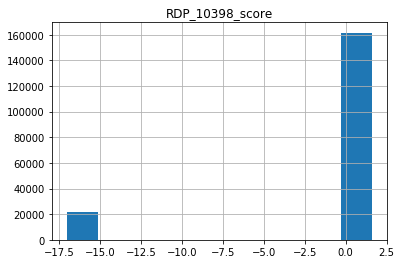

In [55]:
y_rdp_10398_log.hist()

In [56]:

y_rdp_10398.describe()

,RDP_10398_score
count,182991.000000
mean,2.643835
std,4.819320
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,38.000000


In [51]:

x_rdp_10398_log = np.log10(x_rdp_10398+0.00000000000000001)
x_rdp_10398_log.describe()

,RDP_10398_adcl,RDP_10398_edpl,RDP_10398_mindistl,RDP_10398_prichness
count,1.829910e+05,1.829910e+05,1.829910e+05,182991.00000
mean,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
std,1.776362e-15,1.776362e-15,2.664543e-15,0.00000
min,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
25%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
50%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
75%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
max,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x015F2AD0>,
      dtype=object)

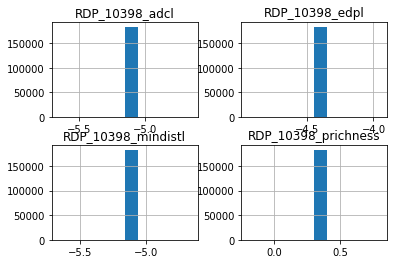

In [53]:
x_rdp_10398_log.hist()

In [54]:
model_rdp_10398_log=sm.OLS(y_rdp_10398_log,x_rdp_10398_log).fit()
pridictions_rdp_10398_log=model_rdp_10398_log.predict(x_rdp_10398_log)
model_rdp_10398_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RDP_10398_score   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   -0.5303
Date:                Tue, 10 Dec 2019   Prob (F-statistic):               1.00
Time:                        09:37:59   Log-Likelihood:            -5.7433e+05
No. Observations:              182991   AIC:                         1.149e+06
Df Residuals:                  182989   BIC:                         1.149e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
RDP_10398_adcl       3.275e+08   7.46e+08      0.439      0.661   -1.13e+09    1.79e+09
RDP_10398_edpl      -4.271e+08   9.72e+08     -0.439      0.661   -2.33e+09    1.48e+09
RDP_10398_mindistl   4.346e+07    9.9e+07      0.439      0.661    -1.5e+08    2.37e+08
RDP_10398_prichness  4.043e+07   9.21e+07      0.439      0.661    -1.4e+08    2.21e+08
==============================================================================
Omnibus:                    80641.233   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           274672.779
Skew:                          -2.377   Prob(JB):                         0.00
Kurtosis:                       6.664   Cond. No.                     3.00e+36
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

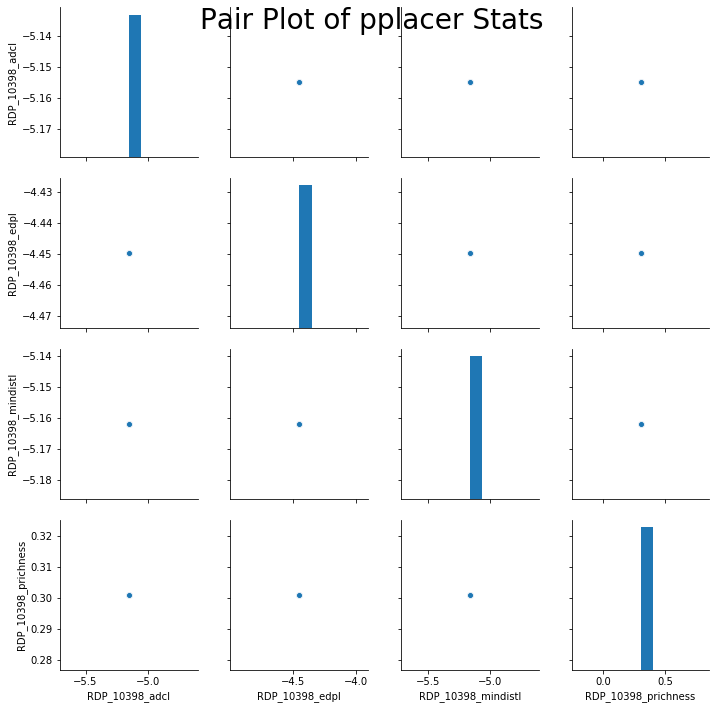

In [73]:
sns.pairplot(x_rdp_10398_log)
# Title 
plt.suptitle('Pair Plot of pplacer Stats', 
             size = 28);

In [70]:
x_rdp_10398_log.describe()

,RDP_10398_adcl,RDP_10398_edpl,RDP_10398_mindistl,RDP_10398_prichness
count,1.829910e+05,1.829910e+05,1.829910e+05,182991.00000
mean,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
std,1.776362e-15,1.776362e-15,2.664543e-15,0.00000
min,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
25%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
50%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
75%,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103
max,-5.154902e+00,-4.449680e+00,-5.162034e+00,0.30103


unique_index
CC11CM9AGEL01000014.278829.280347    -5.154902
CC11CM10AGEL01000014.278829.280347   -5.154902
CC11CM11AGEL01000014.278829.280347   -5.154902
CC11CM12AGEL01000014.278829.280347   -5.154902
CC11CM13AGEL01000014.278829.280347   -5.154902
CC11CM14AGEL01000014.278829.280347   -5.154902
CC11CM15AGEL01000014.278829.280347   -5.154902
CC11CM16AGEL01000014.278829.280347   -5.154902
CC11CM17AGEL01000014.278829.280347   -5.154902
CC11CM18AGEL01000014.278829.280347   -5.154902
CC11CM19AGEL01000014.278829.280347   -5.154902
CC11CM20AGEL01000014.278829.280347   -5.154902
CC11CM21AGEL01000014.278829.280347   -5.154902
CC11CM22AGEL01000014.278829.280347   -5.154902
CC11CM23AGEL01000014.278829.280347   -5.154902
CC11CM24AGEL01000014.278829.280347   -5.154902
CC11CM25AGEL01000014.278829.280347   -5.154902
CC11CM26AGEL01000014.278829.280347   -5.154902
CC11CM27AGEL01000014.278829.280347   -5.154902
CC11CM28AGEL01000014.278829.280347   -5.154902
CC11CM29AGEL01000014.278829.280347   -5.154902
